In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from math import floor

In [3]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [4]:
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

In [5]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

lineal0 = lambda x,a : a*x
lineal = lambda x,a,b : a*x+b

ureg = pint.UnitRegistry()

In [6]:
tau = 0.946*ureg.millihenry/(2.97*ureg.kiloohm)
tau = tau.to_base_units()
w = 1/(10*tau)
w

313953.48837209307 <Unit('1 / second')>

In [12]:
1/(np.sqrt(0.01*90*10**(-9))*(2*np.pi))

5305.164769729845

In [35]:
Rs_L = np.array([1070.0,1262.0,1492.0,1982.0,2612.0,3018.0,3462.0,3980.0,5000.0,5500.0])
err_Rs_L = np.array([1070.0*0.005,1262.0*0.005+2*2,1982.0*0.005++2*2,2612.0*0.005+2*2,3018*0.005+2*8,3462.0*0.005+2*2,3980.0*0.005,5000.0*0.005,5500.0*0.005])
err_Rs_L

array([ 5.35, 10.31, 13.91, 17.06, 31.09, 21.31, 19.9 , 25.  , 27.5 ])

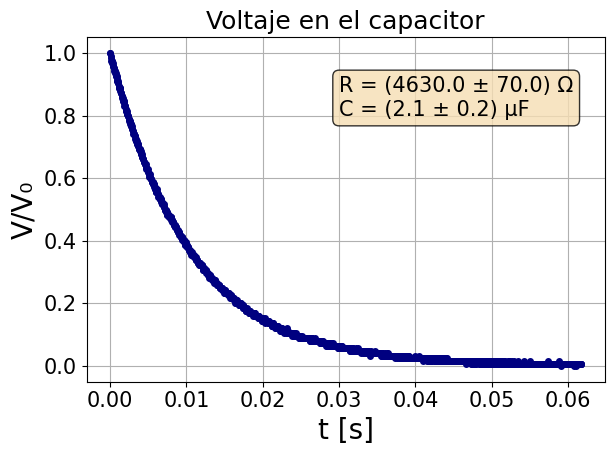

In [240]:
df = pd.read_csv(f'RC/{Rs_C[0]}_d.csv').iloc[190:1735]
df.V_m = df.V_m - min(df.V_m)
df.V_m = df.V_m/max(df.V_m)
df.t = df.t - min(df.t)

#pars,cov = 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

plt.scatter(df.t,df.V_m,c='navy')
plt.grid()
plt.xlabel('t [s]',fontsize=20)
plt.ylabel(u'V/V\u2080',fontsize=20)
plt.title('Voltaje en el capacitor')
plt.tight_layout()
plt.text(0.03,0.8,f'R = ({np.round(Rs_C[0],dcmls(err_Rs_C[0]))} \u00B1 {np.round(err_Rs_C[0],dcmls(err_Rs_C[0]))}) \u03A9\nC = (2.1 \u00B1 0.2) \u03BCF',bbox=props)
plt.savefig('G4.pdf')

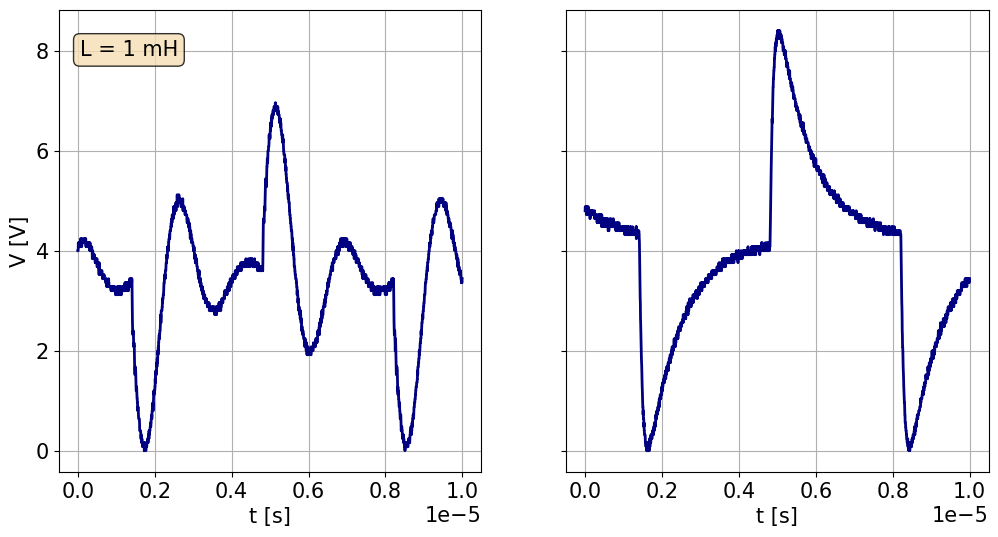

In [261]:
figs,axs = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
for i in range(2):
    df = pd.read_csv(f'pruebas RL/{i+1}.csv')
    axs[i].plot(df.t-min(df.t),df.V_m-min(df.V_m),'navy')
    axs[i].grid()
    axs[i].set_xlabel('t [s]')

plt.text(0.05,0.9,f'L = 1 mH',bbox=props,transform=axs[0].transAxes)

axs[0].set_ylabel('V [V]')
plt.savefig('G4.pdf')